# Final Report 
#### Daniel Short and Kobe Collison 

In [2767]:
from pandas import read_csv


filename = "data_n15.csv"
#Reading in the file of data


In [2768]:
dataF = read_csv(filename, header=0)
'''Read in the file'''
shape = dataF.shape
'''Find the size of the data'''
print(shape)

(45, 12)


In [2769]:
dataF.head()

,Unnamed: 0,filename,category,DARK_BLUE,LIGHT_BLUE,CYAN,VIOLET,PURPLE,PINK,ORANGE,RED,YELLOW
0,0,images\daytime\daytime_1.jpg,daytime,1797,34733,3248,33590,9839,1796,130,69,1198
1,1,images\daytime\daytime_10.jpg,daytime,4494,30977,18520,2911,19003,3808,270,2915,3502
2,2,images\daytime\daytime_11.jpg,daytime,1066,15882,0,0,8132,9580,22267,25936,3537
3,3,images\daytime\daytime_12.jpg,daytime,11608,15578,11866,16285,13488,211,6511,21449,204
4,4,images\daytime\daytime_13.jpg,daytime,7467,10338,10,4260,24916,23944,114,1659,12


In [2770]:
'''Drop the row holding indexes because it does this for us'''
dataF = dataF.drop('Unnamed: 0', axis=1)

'''We are also dropping the filename column because we already have a dedicated class column to so we dont need
this column because it serves the same function as the class column '''
dataF = dataF.drop('filename', axis=1)


In [2771]:
dataF.head()

,category,DARK_BLUE,LIGHT_BLUE,CYAN,VIOLET,PURPLE,PINK,ORANGE,RED,YELLOW
0,daytime,1797,34733,3248,33590,9839,1796,130,69,1198
1,daytime,4494,30977,18520,2911,19003,3808,270,2915,3502
2,daytime,1066,15882,0,0,8132,9580,22267,25936,3537
3,daytime,11608,15578,11866,16285,13488,211,6511,21449,204
4,daytime,7467,10338,10,4260,24916,23944,114,1659,12


Now that we have the data cleaned we can do both the exploratory clustering and classification models

In [2772]:
'''Importing assets needed to classify'''
import pandas as pd
import pylab as pl
import numpy as np

import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline
# the output of plotting commands is displayed inline within frontends like the Jupyter notebook, 
# directly below the code cell that produced it. The resulting plots will then also be stored 
# in the notebook document.
 
import matplotlib.pyplot as plt

In [2773]:
import csv

'''Understanding what our data looks like'''
print(dataF)

   category  DARK_BLUE  LIGHT_BLUE   CYAN  VIOLET  PURPLE   PINK  ORANGE  \
0   daytime       1797       34733   3248   33590    9839   1796     130   
1   daytime       4494       30977  18520    2911   19003   3808     270   
2   daytime       1066       15882      0       0    8132   9580   22267   
3   daytime      11608       15578  11866   16285   13488    211    6511   
4   daytime       7467       10338     10    4260   24916  23944     114   
5   daytime        154       32930  15481   11281    3069  21786     982   
6   daytime       1465       23913   7940   10536   19932    305    2317   
7   daytime       7258       40315      0     326   17808  13305     644   
8   daytime       9959       48198  12771    3919    9241   4889     478   
9   daytime          0       63715  22359       0       0    326       0   
10  daytime        344       46776   2663   16240       0  14977       0   
11  daytime          0       86818   5316   18312       0  19154       0   
12  daytime 

In [2774]:
'''A lot of the cleaning we had to do for the lexos data set isnt used here because we are creating the 
for this exact purpose thus we can kink out a lot of the mistakes and useless data when creating it making this
process a lot easier'''
list(dataF.columns)



['category',
 'DARK_BLUE',
 'LIGHT_BLUE',
 'CYAN',
 'VIOLET',
 'PURPLE',
 'PINK',
 'ORANGE',
 'RED',
 'YELLOW']

In [2775]:
'''Creating the dataframe to be used '''
npArray = dataF.to_numpy()
pdf = pd.DataFrame(npArray)
'''A visualization of the dataframe'''
print(pdf)

          0      1      2      3      4       5      6      7      8      9
0   daytime   1797  34733   3248  33590    9839   1796    130     69   1198
1   daytime   4494  30977  18520   2911   19003   3808    270   2915   3502
2   daytime   1066  15882      0      0    8132   9580  22267  25936   3537
3   daytime  11608  15578  11866  16285   13488    211   6511  21449    204
4   daytime   7467  10338     10   4260   24916  23944    114   1659     12
5   daytime    154  32930  15481  11281    3069  21786    982    601    116
6   daytime   1465  23913   7940  10536   19932    305   2317  13103   6889
7   daytime   7258  40315      0    326   17808  13305    644   4082    862
8   daytime   9959  48198  12771   3919    9241   4889    478     47   7698
9   daytime      0  63715  22359      0       0    326      0      0      0
10  daytime    344  46776   2663  16240       0  14977      0      0      0
11  daytime      0  86818   5316  18312       0  19154      0      0      0
12  daytime 

In [2776]:
'''create dataframe of features (X) and classes (y)'''



min_max_scaler = preprocessing.MinMaxScaler()
pdf[[ 1, 2, 3, 4, 5, 6, 7, 8, 9]] = min_max_scaler.fit_transform(pdf[[ 1, 2, 3, 4, 5, 6, 7, 8, 9]].values)
pdf = pd.DataFrame(pdf)



pdf


,0,1,2,3,4,5,6,7,8,9
0,daytime,0.023831,0.400067,0.145266,1.000000,0.085962,0.054396,0.003829,0.001074,0.045823
1,daytime,0.059598,0.356804,0.828302,0.086663,0.166026,0.115335,0.007952,0.045389,0.133950
2,daytime,0.014137,0.182934,0.000000,0.000000,0.071048,0.290154,0.655799,0.403843,0.135289
3,daytime,0.153942,0.179433,0.530704,0.484817,0.117842,0.006391,0.191759,0.333977,0.007803
4,daytime,0.099025,0.119077,0.000447,0.126823,0.217687,0.725202,0.003357,0.025832,0.000459
5,daytime,0.002042,0.379299,0.692383,0.335844,0.026813,0.659842,0.028921,0.009358,0.004437
6,daytime,0.019428,0.275438,0.355114,0.313665,0.174142,0.009238,0.068239,0.204023,0.263502
7,daytime,0.096254,0.464362,0.000000,0.009705,0.155585,0.402974,0.018967,0.063560,0.032971
8,daytime,0.132073,0.555161,0.571179,0.116672,0.080737,0.148075,0.014078,0.000732,0.294446
9,daytime,0.000000,0.733892,1.000000,0.000000,0.000000,0.009874,0.000000,0.000000,0.000000


In [2777]:

'''create array of features'''
features = pdf.columns

''' create array of classes'''
classes = pdf[0].unique()

In [2778]:
'''Must check the types to see if we have to change any to work for the model'''
pdf.dtypes

0     object
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
9    float64
dtype: object

In [2779]:
'''We must change the types of the data to become usable for the model'''
pdf[features[1]] = pdf[features[1]].astype('double')
pdf[features[2]] = pdf[features[2]].astype('double')
pdf[features[3]] = pdf[features[3]].astype('double')
pdf[features[4]] = pdf[features[4]].astype('double')
pdf[features[5]] = pdf[features[5]].astype('double')
pdf[features[6]] = pdf[features[6]].astype('double')
pdf[features[7]] = pdf[features[7]].astype('double')
pdf[features[8]] = pdf[features[8]].astype('double')
pdf[features[9]] = pdf[features[9]].astype('double')

'''Change the names to integer values so that we can just use these to predict for our model instead of strings'''
pdf.loc[pdf[0] == 'daytime',0] = 0
pdf.loc[pdf[0] == 'night',0] = 1
pdf.loc[pdf[0] == 'sunset',0] = 2

pdf[0] = pdf[0].astype('int')

There is no need to drop any of the rows because there is an even amount of data so that the calculations will be fair 

In [2780]:
print(pdf)

    0         1         2         3         4         5         6         7  \
0   0  0.023831  0.400067  0.145266  1.000000  0.085962  0.054396  0.003829   
1   0  0.059598  0.356804  0.828302  0.086663  0.166026  0.115335  0.007952   
2   0  0.014137  0.182934  0.000000  0.000000  0.071048  0.290154  0.655799   
3   0  0.153942  0.179433  0.530704  0.484817  0.117842  0.006391  0.191759   
4   0  0.099025  0.119077  0.000447  0.126823  0.217687  0.725202  0.003357   
5   0  0.002042  0.379299  0.692383  0.335844  0.026813  0.659842  0.028921   
6   0  0.019428  0.275438  0.355114  0.313665  0.174142  0.009238  0.068239   
7   0  0.096254  0.464362  0.000000  0.009705  0.155585  0.402974  0.018967   
8   0  0.132073  0.555161  0.571179  0.116672  0.080737  0.148075  0.014078   
9   0  0.000000  0.733892  1.000000  0.000000  0.000000  0.009874  0.000000   
10  0  0.004562  0.538782  0.119102  0.483477  0.000000  0.453615  0.000000   
11  0  0.000000  1.000000  0.237757  0.545162  0.000

We are now at the point to start setting up our datasets into training and test sets. For this, we will use a conventional naming scheme, (capital) X and (lowercase) y:
- X denoting the features of all rows and 
- y denoting the class of each of the rows.

In [2781]:
feature_df = pdf[[features[1], features[2], features[3], features[4], features[5], features[6],features[7],
 features[8], features[9]]]
X = np.asarray(feature_df)

y = np.asarray(pdf[0])

print(X.shape)
print(y.shape)

(45, 9)
(45,)


In [2782]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.2)
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.2, random_state=2)
#The random_state is used when you want to predict the same data over and over again

# print out the shapes of the training set and the testing set
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (36, 9) (36,)
Test set: (9, 9) (9,)


Kenrel Implementation

In [2783]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [2784]:
yhat = clf.predict(X_test)
yhat 

array([0, 1, 0, 1, 2, 2, 0, 1, 2])

Here is a function defined to construct a confusion matrix

In [2785]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      0.75      0.86         4
           2       0.33      0.50      0.40         2

    accuracy                           0.67         9
   macro avg       0.67      0.64      0.64         9
weighted avg       0.74      0.67      0.69         9

Confusion matrix, without normalization
[[2 0 1]
 [0 3 1]
 [1 0 1]]


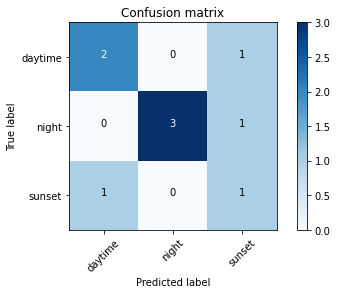

In [2786]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['daytime','night','sunset'],normalize= False,  title='Confusion matrix')

### Classify

In [2787]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X[0:44], y[0:44], test_size=1, random_state=0)

X_testset = X[3:4]
y_testset = y[3:4]

print ('Train set:', X_trainset.shape,  y_trainset.shape)
print ('Test set:', X_testset.shape,  y_testset.shape)

Train set: (43, 9) (43,)
Test set: (1, 9) (1,)


In [2788]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_trainset, y_trainset) 

SVC()

In [2789]:
# create predictions on the testset
yhat = clf.predict(X_testset)

# print first (and only) prediction
yhat

array([0])

In [2790]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Confusion matrix, without normalization
[[1 0 0]
 [0 0 0]
 [0 0 0]]


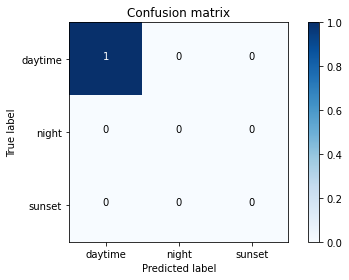

In [2791]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_testset, yhat, labels=[0,1,2])
np.set_printoptions(precision=2)

print (classification_report(y_testset, yhat))

# Plot non-normalized confusion matrix
plt.figure()
x_labels = pdf[0].tolist()
plt.xlabel("PREDICTED VALUE")
plt.ylabel("TRUE VALUE")

plot_confusion_matrix(cnf_matrix, classes=['daytime','night','sunset'],normalize= False,  title='Confusion matrix')

In [2792]:
df = dataF
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt




[Text(0.5555555555555556, 0.875, 'X[0] <= 0.27\ngini = 0.667\nsamples = 45\nvalue = [15, 15, 15]'),
 Text(0.3333333333333333, 0.625, 'X[1] <= 0.147\ngini = 0.497\nsamples = 28\nvalue = [15, 0, 13]'),
 Text(0.2222222222222222, 0.375, 'X[6] <= 0.045\ngini = 0.231\nsamples = 15\nvalue = [2, 0, 13]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 13]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 13\nvalue = [13, 0, 0]'),
 Text(0.7777777777777778, 0.625, 'X[7] <= 0.169\ngini = 0.208\nsamples = 17\nvalue = [0, 15, 2]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 15\nvalue = [0, 15, 0]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]')]

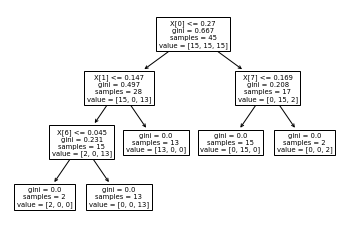

In [2793]:
from sklearn import tree
names = [_ for _ in 'abcdef']

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)

In [2794]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("Daytime") 

'Daytime.pdf'

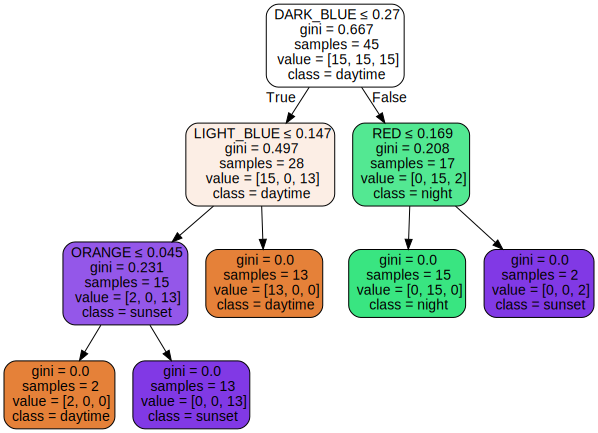

In [2795]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names= [
                        
 'DARK_BLUE',
 'LIGHT_BLUE',
 'CYAN',
 'VIOLET',
 'PURPLE',
 'PINK',
 'ORANGE',
 'RED',
 'YELLOW'],  
                      class_names=['daytime','night','sunset'] ,  
                      filled=True, rounded=True,  
                      special_characters=True) 
graph = graphviz.Source(dot_data)
graph                     